<a href="https://colab.research.google.com/github/BenJ-cell/Case_study_Operations_Intern/blob/main/Benjamin_Cohen_Case_study_Operations_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*# **Benjamin** Cohen - Blitz : Case study: Operations Intern*

# **Preliminary Study On the Customers' File Used In Question 2**

# Unzip the **file**

In [ ]:
!unzip 'Case study - Ops intern.zip'

Archive:  Case study - Ops intern.zip
replace Case study - Ops intern/Case study - Ops intern.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Case study - Ops intern/Case study - Ops intern.pdf  
  inflating: __MACOSX/Case study - Ops intern/._Case study - Ops intern.pdf  
  inflating: Case study - Ops intern/Case study - Ops intern.csv  
  inflating: __MACOSX/Case study - Ops intern/._Case study - Ops intern.csv  


# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

# **Read the csv file**

In [ ]:
df = pd.read_csv('/content/Case study - Ops intern/Case study - Ops intern.csv')

# **Exploratory data analysis keeping failed transactions**

In [ ]:
df.head()

,Date;Method;Amount;Success?
0,01/01/2022;ApplePay;7;Yes
1,01/01/2022;ApplePay;12;Yes
2,01/01/2022;ApplePay;5;Yes
3,01/01/2022;ApplePay;12;Yes
4,01/01/2022;ApplePay;15;Yes


In [ ]:
df.isna().sum() # Number of NaNs in the dataset.

Date;Method;Amount;Success?    0
dtype: int64

In [ ]:
df.columns # Visualize the various features.

Index(['Date;Method;Amount;Success?'], dtype='object')

We can see that the dataset has only one column but four features in reality. To get a more sensible data representation we use the method split of Python.

In [ ]:
# Print the 10th first samples showing how we would like the data to be segmented.
for x in range (0,10):
  print (list(df['Date;Method;Amount;Success?'])[x].split(';'))

['01/01/2022', 'ApplePay', '7', 'Yes']
['01/01/2022', 'ApplePay', '12', 'Yes']
['01/01/2022', 'ApplePay', '5', 'Yes']
['01/01/2022', 'ApplePay', '12', 'Yes']
['01/01/2022', 'ApplePay', '15', 'Yes']
['01/01/2022', 'ApplePay', '14', 'Yes']
['01/01/2022', 'ApplePay', '15', 'Yes']
['01/01/2022', 'ApplePay', '14', 'Yes']
['01/01/2022', 'ApplePay', '10', 'Yes']
['01/01/2022', 'ApplePay', '7', 'Yes']


In [ ]:
# For Each Feature, Add A Column To The Dataset.
df['Date']= [x.split(';')[0] for x in df['Date;Method;Amount;Success?']]
df['Method']= [x.split(';')[1] for x in df['Date;Method;Amount;Success?']]
df['Amount']= [x.split(';')[2] for x in df['Date;Method;Amount;Success?']]
df['Success']= [x.split(';')[3] for x in df['Date;Method;Amount;Success?']]

In [ ]:
df.head() # Old Dataset With The New Columns.

,Date;Method;Amount;Success?,Date,Method,Amount,Success
0,01/01/2022;ApplePay;7;Yes,01/01/2022,ApplePay,7,Yes
1,01/01/2022;ApplePay;12;Yes,01/01/2022,ApplePay,12,Yes
2,01/01/2022;ApplePay;5;Yes,01/01/2022,ApplePay,5,Yes
3,01/01/2022;ApplePay;12;Yes,01/01/2022,ApplePay,12,Yes
4,01/01/2022;ApplePay;15;Yes,01/01/2022,ApplePay,15,Yes


In [ ]:
del df['Date;Method;Amount;Success?'] # Delete Old Column.
df.head() # New Dataset.

,Date,Method,Amount,Success
0,01/01/2022,ApplePay,7,Yes
1,01/01/2022,ApplePay,12,Yes
2,01/01/2022,ApplePay,5,Yes
3,01/01/2022,ApplePay,12,Yes
4,01/01/2022,ApplePay,15,Yes


In [ ]:
df.isna().sum() # Number of NaNs in the dataset.

Date       0
Method     0
Amount     0
Success    0
dtype: int64

In [ ]:
print(df.nunique()) # Number Of Unique Items In Each Columns.
                    # We can see that the data was collected over a month, the customers paid 90 unique prices
                    # using 3 methods of payment and either got a successful or failed transaction.

Date       30
Method      3
Amount     90
Success     2
dtype: int64


In [ ]:
type(df['Amount'][0]) # The type of amount is not integer here.

str

In [ ]:
df['Amount'] = [int(amount) for amount in df['Amount']] # We convert the amounts'type to integer.

In [ ]:
# We can see the structure of the date in strings.
print(type(df['Date'][0]))
for i in range(len(df['Date'][0])):
  print(df['Date'][0][i])

<class 'str'>
0
1
/
0
1
/
2
0
2
2


In [ ]:
print(type(df['Date'][0])) # Our dates are still strings.
df['Date'] = [datetime.strptime(x, '%d/%m/%Y') for x in df['Date']] # We change their type to datetime object.
print(type(df['Date'][0])) # We get a conversion of dates to timestamps.

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# We print a statistical description of the amounts paid by the customers.
df.describe()

,Amount
count,1060.000000
mean,33.916038
std,24.456810
min,5.000000
25%,13.000000
50%,30.000000
75%,40.000000
max,100.000000


In [ ]:
print(df['Amount'].value_counts()) # Prints The Various Amounts Spent By The Customers from 5 to 100 
                                   # and their repartition.

6     38
30    37
14    36
7     35
39    35
      ..
81     2
93     1
97     1
71     1
59     1
Name: Amount, Length: 90, dtype: int64


In [ ]:
df['Method'].value_counts() # Various Methods of Payments.

Paypal      367
Card        353
ApplePay    340
Name: Method, dtype: int64

**Full Dataset Methods of Payments Pie Plot**

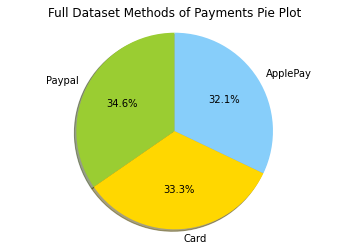

In [ ]:
counts = df['Method'].value_counts() # Various Methods of Payments.
methods = 'Paypal', 'Card', 'ApplePay'
sizes = [counts[0], counts[1], counts[2]]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0)

plt.pie(sizes, explode=explode, labels=methods, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Full Dataset Methods of Payments Pie Plot')
plt.show()

It seems at first sight that the three methods of payment are equally used by the customers. We will see later that by taking the failed transactions off our dataset, we have drastic changes and the proportion of people using the card method is way less important than what we initially think. Most successful transactions occure in reality on PayPal and ApplePay.

In [ ]:
print('Total amount supposedly gained by Blitz including the failed transactions:', df['Amount'].sum())

Total amount supposedly gained by Blitz including the failed transactions: 35951


In [ ]:
df.info() # Print basic info about the features to check irrelevant data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1060 non-null   datetime64[ns]
 1   Method   1060 non-null   object        
 2   Amount   1060 non-null   int64         
 3   Success  1060 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 33.2+ KB


# **Basic description of High and Low Customers without failed transactions**

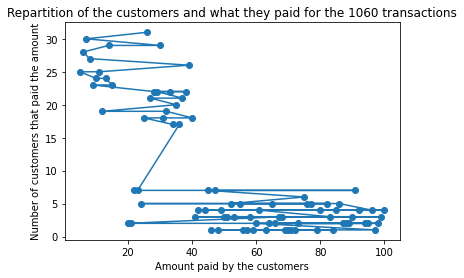

In [ ]:
# We see two clusters segmented using the price spent on the app.
passed_transactions =  df[df['Success']=='Yes']
plt.plot(passed_transactions['Amount'].value_counts(),marker="o")
plt.xlabel("Amount paid by the customers")
plt.ylabel("Number of customers that paid the amount")
plt.title("Repartition of the customers and what they paid for the 1060 transactions")
plt.show()

In [ ]:
# In the following we will call the people that paid over 40 dollars the 'high customers' and the people that
# paid less the 'low customers'.
print('Dataset description for amounts <= 40\n',  passed_transactions[passed_transactions['Amount']<=40 ]['Amount'].describe())

Dataset description for amounts <= 40
 count    643.000000
mean      22.278383
std       11.668391
min        5.000000
25%       11.000000
50%       26.000000
75%       33.000000
max       40.000000
Name: Amount, dtype: float64


count    804.000000
mean      31.835821
std       23.248517
min        5.000000
25%       12.750000
50%       29.000000
75%       39.000000
max      100.000000
Name: Amount, dtype: float64


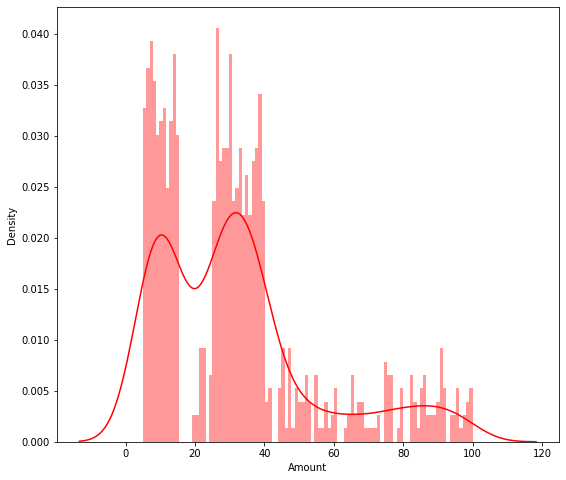

In [ ]:
# By plotting the amounts we get an idea of how distributed the data is. We can see that most customers are
# spending between 5 and 40 dollars on the app.
print(passed_transactions['Amount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(passed_transactions['Amount'], color='r', bins=100);

**Boxplot of the full dataset (without failed transactions)**

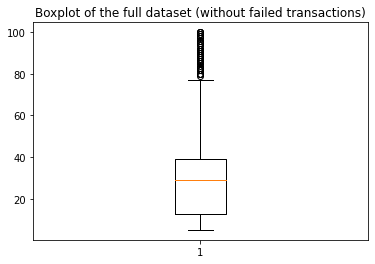

In [ ]:
plt.boxplot(passed_transactions['Amount'])
plt.title('Boxplot of the full dataset (without failed transactions)')
plt.show()

**`Boxplot of the low customers dataset (without failed transactions)`**

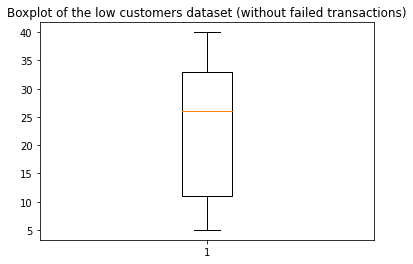

In [ ]:
plt.boxplot(passed_transactions[passed_transactions['Amount']<=40]['Amount'])
plt.title('Boxplot of the low customers dataset (without failed transactions)')
plt.show()

**Boxplot of the high customers dataset (without failed transactions)**

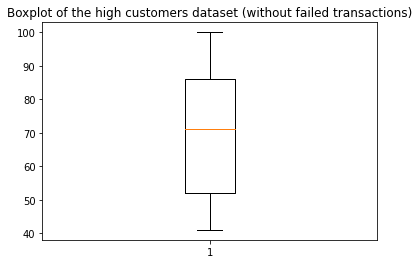

In [ ]:
plt.boxplot(passed_transactions[passed_transactions['Amount']>40]['Amount'])
plt.title('Boxplot of the high customers dataset (without failed transactions)')
plt.show()

In [ ]:
# We see that the amounts generated by high and low customers are about the same. We could focus on those two
# clusters to get a segmentation. Then we can also cut the low customers part between very low customers
# that pay between 5 and 20 and a middle low class between 20 and 40.
print('Total amounts generated by the',len(passed_transactions[passed_transactions['Amount']<=40]), 'low customers:', passed_transactions[passed_transactions['Amount']<=40]['Amount'].sum())
print('Total amounts generated by the ', 1060-len(passed_transactions[passed_transactions['Amount']<=40]), ' high customers:', passed_transactions[passed_transactions['Amount']>(40)]['Amount'].sum())

Total amounts generated by the 643 low customers: 14325
Total amounts generated by the  417  high customers: 11271


# **Failed Transactions**

In [ ]:
# We may observe that in several cases the operation did not operate successfully.
failed_transactions = df[df['Success']=='No']
failed_transactions

,Date,Method,Amount,Success
18,2022-01-01,Card,30,No
19,2022-01-01,Card,74,No
20,2022-01-01,Card,32,No
21,2022-01-01,Card,89,No
26,2022-01-01,Paypal,33,No
...,...,...,...,...
1047,2022-01-30,Card,68,No
1048,2022-01-30,Card,34,No
1049,2022-01-30,Card,27,No
1050,2022-01-30,Card,31,No


In [ ]:
# Statistical description of the failed transactions.
print('Statistical description of the failed transactions')
print(failed_transactions['Amount'].describe())

Statistical description of the failed transactions
count    256.000000
mean      40.449219
std       26.935168
min        5.000000
25%       22.000000
50%       35.000000
75%       58.500000
max      100.000000
Name: Amount, dtype: float64


In [ ]:
print('Amount not gained by Blitz over those failed transactions:', failed_transactions['Amount'].sum())
print('This represents',100 *(failed_transactions['Amount'].sum()/df['Amount'].sum()), '% of the initial total gain')

Amount not gained by Blitz over those failed transactions: 10355
This represents 28.803093098940224 % of the initial total gain


In [ ]:
# Statistical description of the dataset without failed transactions.
print('Statistical description without failed transactions')
print(passed_transactions['Amount'].describe())
print('Total gained by Blitz without the failed transactions:', passed_transactions['Amount'].sum())

Statistical description without failed transactions
count    804.000000
mean      31.835821
std       23.248517
min        5.000000
25%       12.750000
50%       29.000000
75%       39.000000
max      100.000000
Name: Amount, dtype: float64
Total gained by Blitz without the failed transactions: 25596


In [ ]:
# Differences between fraud and normal customers way of payments.
print('Passed Transactions Methods of Payments\n')
print(passed_transactions['Method'].value_counts()) # The different Methods of Payments Used for normal customers.

Passed Transactions Methods of Payments

Paypal      297
ApplePay    277
Card        230
Name: Method, dtype: int64


**Passed Transactions Methods of Payments Pie Plot**

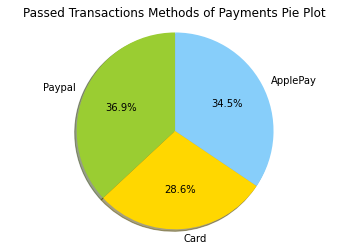

In [ ]:
# Passed Transactions Methods of Payments Pie Plot.
counts = passed_transactions['Method'].value_counts() # Various Methods of Payments.
methods = 'Paypal', 'Card', 'ApplePay'
sizes = [counts[0], counts[2], counts[1]]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0)

plt.pie(sizes, explode=explode, labels=methods, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Passed Transactions Methods of Payments Pie Plot')
plt.show()

As said before, we see that cutting the failed transactions give us a pie plot way less uniform between the 3 classes that we saw before with the full dataset. Successful transactions mostly occure on PayPal and ApplePay. Cards seem to be a more sensible case of payment, with maybe less security or less public access unlike PayPal and ApplePay (considering that having a card requires a bank account and a bit of money to put on this account which are quite constraining for young people for example). In all cases we are going to see in the following that most failed transactions occure using cards.

In [ ]:
print('Failed Transactions Methods of Payments\n')
print(failed_transactions['Method'].value_counts()) # The different Methods of Payments Used in Frauds.

Failed Transactions Methods of Payments

Card        123
Paypal       70
ApplePay     63
Name: Method, dtype: int64


**Failed Transactions Methods of Payments Pie Plot**

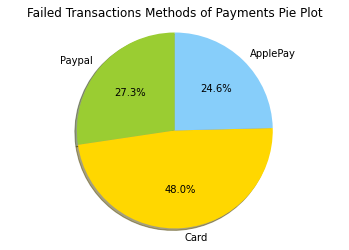

In [ ]:
# Failed Transactions Methods of Payments Pie Plot.
counts = failed_transactions['Method'].value_counts() # Various Methods of Payments.
methods = 'Paypal', 'Card', 'ApplePay'
sizes = [counts[1], counts[0], counts[2]]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0)

plt.pie(sizes, explode=explode, labels=methods, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Failed Transactions Methods of Payments Pie Plot')
plt.show()

There are in total 256 out of 1060 transactions that did not occure making a loss of 29% of the profit. This is considerable and illustrates how important of an issue fraud has become over online websites/applications. In the fraud cases, we have a higher mean for the amount of transactions at 40.5 instead of 31.8 in the normal customers. In the fraud cases our quantiles at 25%; 50%; 75% are respectively 22; 35; 58 against our normal dataset at 12.75; 29; 39. It seems that fraud involves generally more money than normal transactions.

Comparing the methods of transactions we can also see that instead of having relatively equitable proportion of payments between Card/Paypal/ApplePay as in the passed transactions (resp. 230/297/277), failed transactions mostly use the card as method of payment (resp. 120/70/63). Implementing new protections for card payment could seem useful here. A problem in the detection of fraud for Paypal and ApplePay are also possible as we could possibly only detect card fraud which would also explain a majority of card fraud in our dataset .

**Plots of the failed transactions**

count    256.000000
mean      40.449219
std       26.935168
min        5.000000
25%       22.000000
50%       35.000000
75%       58.500000
max      100.000000
Name: Amount, dtype: float64


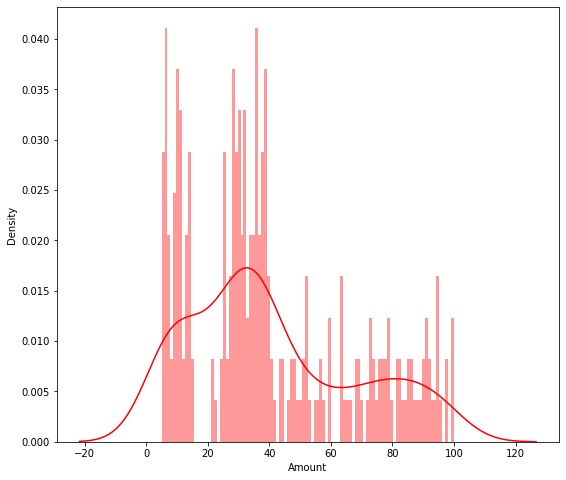

In [ ]:
# Probabilty Distribution of The Amounts Involved In Failed Transactions.
print(failed_transactions['Amount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(failed_transactions['Amount'], color='r', bins=100);

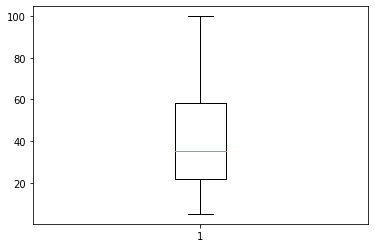

In [ ]:
# Boxplot of the failed transactions.
plt.boxplot(failed_transactions['Amount'])
plt.show()

# **Purchases through time**

In [ ]:
# We can see how many transactions occured each day. By ordering it we may try to learn
# the patterns of cunsomption or if a campaign of engagement worked for the company by bringing new customers.
df['Date'].value_counts()

2022-01-03    46
2022-01-04    46
2022-01-07    45
2022-01-14    44
2022-01-11    43
2022-01-19    42
2022-01-25    41
2022-01-23    40
2022-01-08    37
2022-01-29    37
2022-01-05    36
2022-01-12    36
2022-01-18    35
2022-01-26    35
2022-01-27    35
2022-01-10    34
2022-01-15    33
2022-01-20    33
2022-01-28    33
2022-01-09    33
2022-01-24    33
2022-01-06    33
2022-01-02    32
2022-01-17    32
2022-01-16    32
2022-01-13    30
2022-01-01    28
2022-01-30    27
2022-01-22    26
2022-01-21    23
Name: Date, dtype: int64

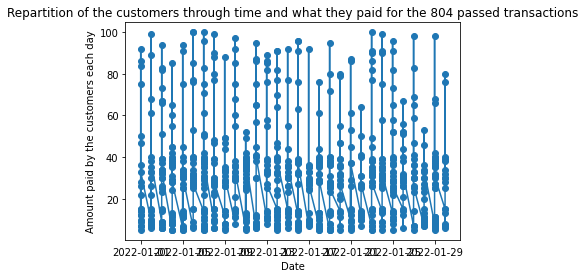

In [ ]:
# Monthly Plot of the transactions. We could try to look over the weeks to search for consistent patterns
# through time.
plt.plot(passed_transactions['Date'],passed_transactions['Amount'],marker="o")
plt.xlabel("Date")
plt.ylabel("Amount paid by the customers each day")
plt.title("Repartition of the customers through time and what they paid for the 804 passed transactions")
plt.show()

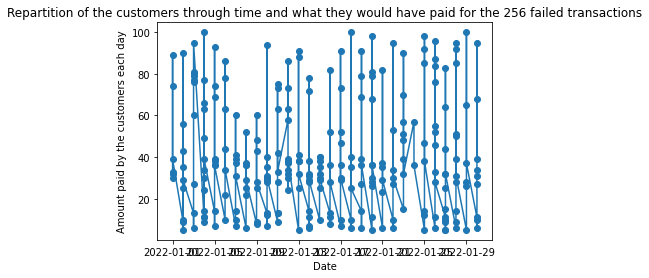

In [ ]:
# Monthly Plot of the failed transactions. We could try to look over the weeks to search for consistent 
# patterns through time.
plt.plot(failed_transactions['Date'],failed_transactions['Amount'],marker="o")
plt.xlabel("Date")
plt.ylabel("Amount paid by the customers each day")
plt.title("Repartition of the customers through time and what they would have paid for the 256 failed transactions")
plt.show()

**Question 1: Fraud - Duplicate accounts**

Some users have multiple accounts within the Blitz App, even though our Terms & Conditions 
prohibit such behavior.
- What risks do you identify with these duplicate accounts?
- Describe a process allowing you to reduce the number of duplicate accounts within 
the App

Several reasons and risks lead us to try to prevent duplicate accounts. Indeed:

* **Wasting Money On Duplicate Announces/Catalogues** to send to the players. That would lead to avoid investing in marketing for clients who are not present and we would have to clean the data aftwerward.
* **Absence Of Customer Supervision**: 2 records the same id makes it hard to understand the clients and their behaviors. For deals and advertisements it is tough to assess which promoting action has worked and at what phase of the deals the client is, assuming that similar clients are in the database.
* **Bad Consequences On Blitz' Reputation**:
By maintaining a great quality of data for players we are insuring that the perception of the brand and their actions are good for their community. In that sense we need to avoid sending too much mails, and calls to the same customer. The business must not seem disorganised to prospects and clients.
* **Wasted Effort On Marketing**:
Indeed sending too much mails to the same person may lead to disturb them enough for them not to read any of the marketing emails and even put them in 'spam'. Before segmenting the clients rightfully for marketing we need to understand them and at which step of the buying process they are to at the same time: get the most sells we can and keep the client on long term.
* **Wrong Reports And Wrongly Informed Decisions**:
To make forecasts and future decisions for the growth of Blitz we need to have a data as accurate as possible to reflect the reality and not be contaminated by bots/faults in the dataset.
* **Dubious Customer' Services**:
Inaccurate data influences every client from the conversations clients/business team to the marketing plan. For the customer, he will lose time searching between several records before accessing to his personnal file. It would be disappointing and annoying for them to lose time and therefore they could leave the company and thus we could lose huge potential revenue gains.



Several processes would allow us to reduce the number of duplicates account within the app:


* First we must set our **matching rules** to spot the **duplicated records**. Either we scan records to spot fields that exactly match or we allow variances in the data for example: William Smith/ Will Smith/ Will Smyth. For each fields (Names, Mails Adresses, etc), we can choose different matching techniques: either exact or fuzzy matching (with variances).
* We could set a **rule for duplication** to fix what happens when several records match. Then we either ask the user to review the different profiles and update his record accordingly to become unique or we prevent this step by blocking the customer when he registers from creating the duplicate record.
* **Requiring facebook login** might be one of the easier and most effective ways to ensure single individuals are not creating multiple accounts.
* We can add a **SMS verification** code during signup.
* Set a **tracking cookie** (i.e. random hash) and log its value on login, look for multiple logins from the same cookie value.
* Logins from **same IP address/user-agent** combination.
* Logins from **same IP address only** (less reliable than the previous two bullets).
* Accounts with **email addresses** from free webmail services. (Gmail etc.)
* Accounts with **same passwords**.




**Question 2: Payments - Deposit analytics**

Currently, Blitz users can deposit cash within the application thanks to multiple payment methods: 
ApplePay, credit cards, and Paypal.
- Which metrics would you analyze if your goal were to drive up user deposits?
- According to the CSV file, what would be your recommendations to strengthen the 
deposits

We want the users to be active on the app in order to perform many transactions. We determine a user’s value by his level of engagement and if they come again and keeps fidelity to the app.
To drive up user deposits several metrics exist: 

* **The activation of a customer**: The activation of a customer represents how active our user is by fulfilling registrations, purchasing on the app, watching advertisements, or making two deposits within a specific time period. 
By looking at new users' growth we can observe if we are gaining activation through time and if our plans are working. Promo codes and referral codes can be used to earn new bonus cash, which can be used to win more real cash. It can become an indicator for us as it would mean that the application would gain visibilty.

* **The reach**: The reach represents the total number of people that used the product recently. It determines the amount of users that may become active through campaigns made by the company for customers' engagement.
It can be the number of paid accounts, or users who have made at least one purchase in the last months. 

* **Active Users**: Defined as the users that either received value from the product or took activation actions recently. The value received here represents a set of actions. Here the value would be the amount spent by the customers, how engage they are, our retention rate... 

* **Engagement of the customers**: We want to be able to measure how frequent and fast the customers' actions take place. The faster the better. Engagement may be defined here as the number of actions taken by the users, how long they watched advertisements or the number/amounts of the transactions they went through. Comparing engagement and activeness of users for example (engagement / activeness of a user) gives us a measure of the depth of engagement per user.


* **Retention**
This metric will show if our product is sticky and is used for a long time. The retention rate is used in marketing reffering to the proportion of customers who stayed customed over a time period. It looks like a fidelity rate as it measures the fidelity of a customers. For retention goals, we choose a time period that is long enough to capture the various cycles of the customers, but short enough for our teams to get feedback to start new operations quickly. For example: 2 weeks retention experiments every time for a 90-day full retention test. 



According to the CSV file, to strengthen the deposits we could: 


* **Segment** our customers between various prices (low and high customers in our exploratory study) and try to offer them special offers with their ranges of payments to get as many customers as we could to purchase on the application. As seen in question 2.a, we also need to work on retention, engagement, activeness of the users and work as a company to have a high reach on the  customers.
* **Implement security by understanding the fraudulous and failed transactions** to prevent them. Either by implementing many preventive protections as seen in question 1 on duplicate accounts to get a more robust system to fraudulous transactions.
* **Check For Time (daily/weekly/monthly) Patterns for Consumptions** to understand the customers' habits and bring new games/settings/updates accordingly to maximize Blitz' profits.
* **Add Features To Modelize The Frauds**: If frauds follow certain patterns, adding features (e.g: number of previous transactions, amounts involved previously, activity of the user, security ranking based on the community/players ratings...) may allow us to understand the similarities and differences between fraud cases and normal customers. Indeed for example in the preliminary analysis we have seen a predominancy of high amounts (higher mean and quantiles) involved in the fraudulous cases compared to normal cases.
* **Work constantly on new securities**: As shown in the analysis, failed transactions still represent 30% of the total amounts of transactions of Blitz in January 2022 even though systems are already in place to work against them. Fraud is constantly evolving and in response security and answers must constantly evolve to take into account more and more different types of frauds.
* **Focus on precise methods of payments**: As shown on the study of failed transactions, the card method of payment seemed way more used than what normal customers would use. Either it is easier to fraud using cards (maybe because of the various securities added by Paypal/ApplePay) or we still do not detect the frauds using the other methods of payment (ApplePay/Paypal) as good as the cards. In either way a more complex analysis should be led revolving around those ideas.

